In [16]:
%matplotlib inline
import pandas as pd
import pandas_datareader # 可以读雅虎财经API数据
import datetime
import matplotlib.pylab as plt
import seaborn as sns
# from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

plt.style.use('ggplot')
# sns.set_style('darkgrid, whitegrid, dark, white, ticks')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题"

In [17]:
stockFile = '/Users/joey/Documents/PycharmProjects/mywork/timeseries/T10yr.csv'
stock = pd.read_csv(stockFile,index_col=0,parse_dates=[0])
stock.head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,6.498,6.603,6.498,6.548,0,6.548
2000-01-04,6.530,6.548,6.485,6.485,0,6.485
2000-01-05,6.521,6.599,6.508,6.599,0,6.599
2000-01-06,6.558,6.585,6.540,6.549,0,6.549
2000-01-07,6.545,6.595,6.504,6.504,0,6.504
2000-01-10,6.540,6.567,6.536,6.558,0,6.558
2000-01-11,6.600,6.664,6.595,6.664,0,6.664
2000-01-12,6.659,6.696,6.645,6.696,0,6.696
2000-01-13,6.664,6.705,6.618,6.618,0,6.618


In [35]:
stock_week = stock['Close'].resample('W-MON').mean()
stock_train = stock_week['2000':'2015']
stock_train.head()

Date
2000-01-03    6.5480
2000-01-10    6.5390
2000-01-17    6.6630
2000-01-24    6.7372
2000-01-31    6.6728
Freq: W-MON, Name: Close, dtype: float64

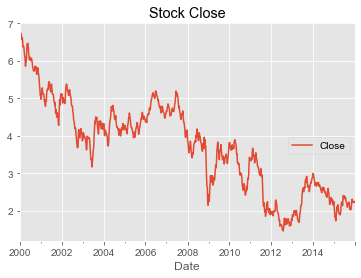

In [36]:
stock_train.plot()
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('Stock Close')
sns.despine()

Text(0.5, 1.0, '一阶差分')

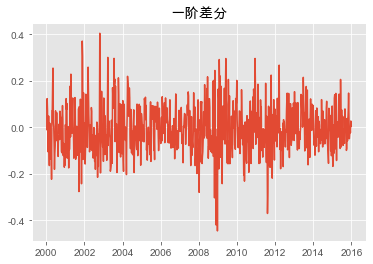

In [40]:
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()
plt.figure()
plt.plot(stock_diff)
plt.title('一阶差分')
plt.show()

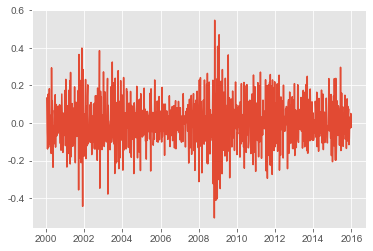

In [41]:
# 二阶差分和一阶差不多，用一阶
stock_diff2 = stock_diff.diff()
stock_diff2 = stock_diff2.dropna()
plt.plot(stock_diff2)

Text(0.5, 1.0, 'PACF')

<Figure size 432x288 with 0 Axes>

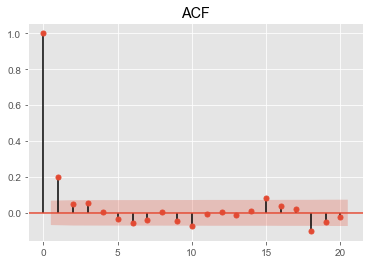

<Figure size 432x288 with 0 Axes>

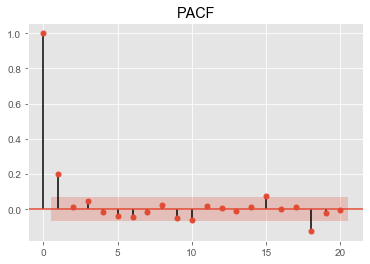

In [46]:
plt.figure()
acf = plot_acf(stock_diff,lags=20)
plt.title('ACF')
plt.figure()
pacf = plot_pacf(stock_diff,lags=20)
plt.title('PACF')

In [93]:
model = ARIMA(stock_train,order=(1,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  834
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 720.846
Method:                       css-mle   S.D. of innovations              0.102
Date:                Fri, 12 Jun 2020   AIC                          -1433.692
Time:                        22:45:20   BIC                          -1414.787
Sample:                    01-10-2000   HQIC                         -1426.444
                         - 12-28-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0052      0.005     -1.145      0.252      -0.014       0.004
ar.L1.D.Close     0.2841      0.203      1.397      0.162      -0.115       0.683
ma.L1.D.Close    -0.0869      0.213     -0.408      0.683      -0.504       0.330
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.5199           +0.0000j            3.5199            0.0000
MA.1           11.5088           +0.0000j           11.5088            0.0000
-----------------------------------------------------------------------------
"""

In [91]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.predict.html
pred = result.predict('20140609','20200701',dynamic=True,typ='levels')
pred

2014-06-09    2.463559
2014-06-16    2.455539
2014-06-23    2.449569
2014-06-30    2.444183
2014-07-07    2.438962
                ...   
2020-06-08    0.845946
2020-06-15    0.840790
2020-06-22    0.835635
2020-06-29    0.830480
2020-07-06    0.825324
Freq: W-MON, Length: 318, dtype: float64

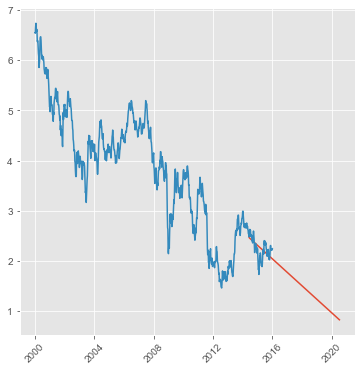

In [92]:
# 预测‘’趋势‘’
plt.figure(figsize=(6,6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(stock_train)

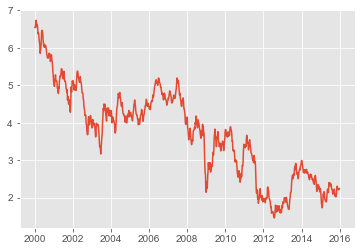